### Imports

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, make_scorer
import lightgbm as lgbm


### Loading data

In [38]:
red_df_raw = pd.read_csv('./wine+quality/winequality-red.csv', sep = ';')
red_df_raw

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [39]:
white_df_raw = pd.read_csv('./wine+quality/winequality-white.csv', sep = ';')
white_df_raw

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### Observations:
* 4898 white wine observations and 1598 red wine observations
* Fixed acidity: continuous (maybe ordinal catagorical)
* Volatile acidity: continuous
* Citric acid: continuous
* Residual sugar: continuous
* Chlorides: continuous
* Free sulfur dioxide: continuous (integers)
* Total sulfur dioxide: continuous (integers)
* Density: continuous
* pH: continuous
* Sulphates: continuous
* Alcohol: continuous
* Quality: ordinal catagorical

# Red Wine

In [40]:
red_df_raw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [41]:
white_df_raw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### Red wine dataset EDA

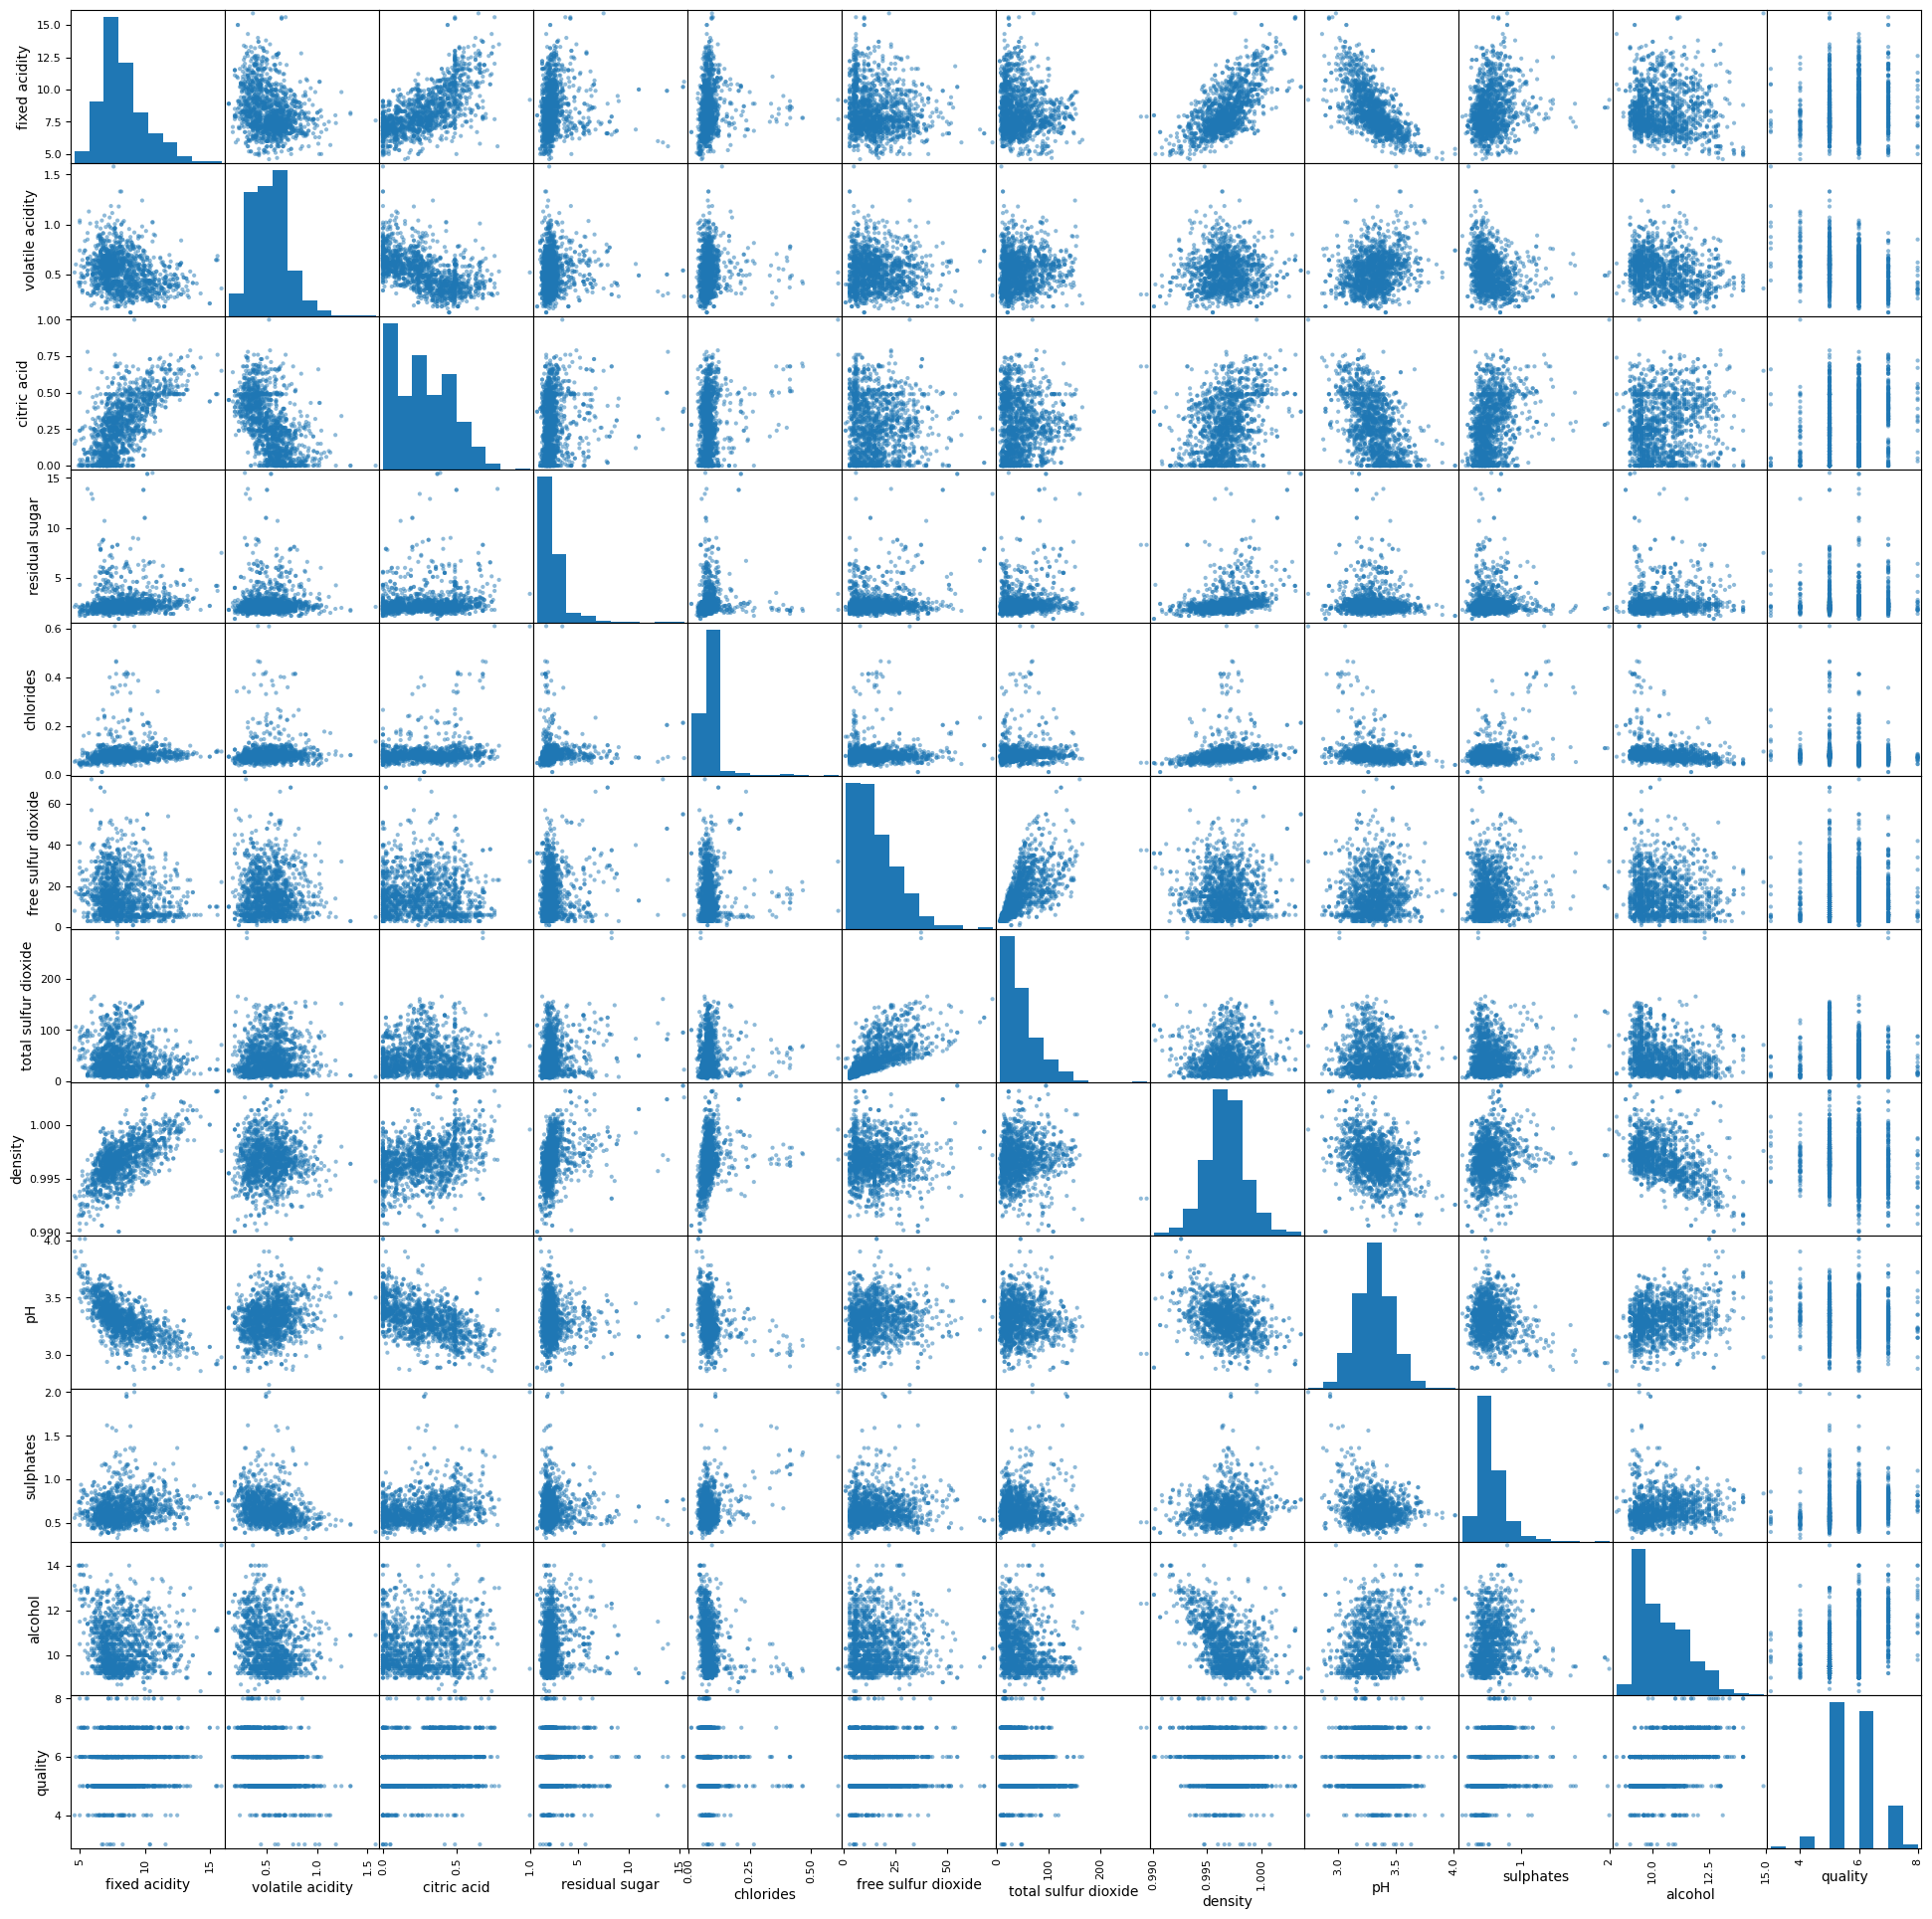

In [42]:
pd.plotting.scatter_matrix(red_df_raw, figsize = (24, 24));

In [43]:
redCorrMatrix = red_df_raw.corr(numeric_only=True)
redCorrMatrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


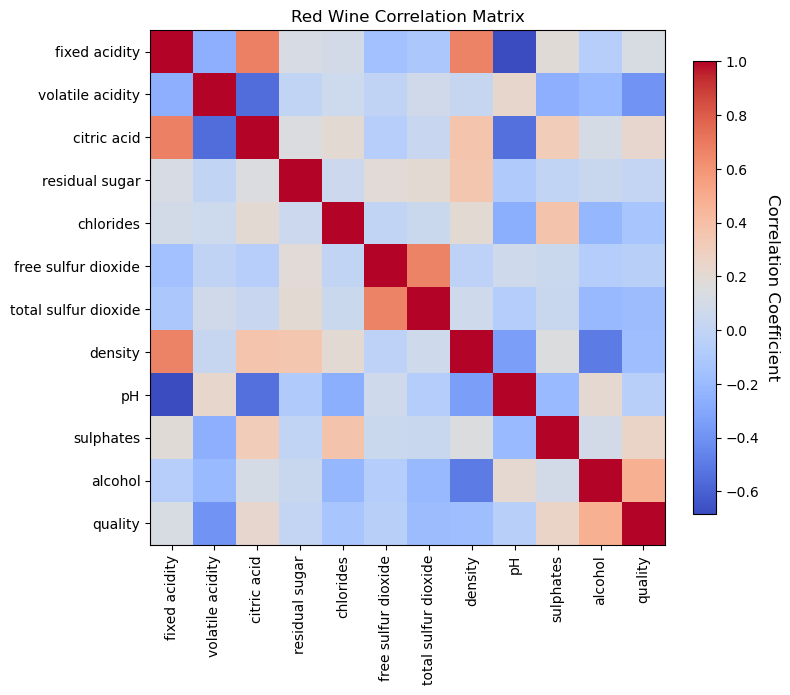

In [44]:
plt.figure(figsize=(8, 8))
im = plt.imshow(redCorrMatrix, cmap='coolwarm', interpolation='none')

# make colorbar smaller by shrinking & reducing fraction
cbar = plt.colorbar(im, fraction=0.04, shrink=0.8)  
cbar.set_label('Correlation Coefficient', fontsize=12)
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_ylabel('Correlation Coefficient', rotation=270, labelpad=15)

plt.xticks(range(len(redCorrMatrix.columns)), redCorrMatrix.columns, rotation=90)
plt.yticks(range(len(redCorrMatrix.columns)), redCorrMatrix.columns)
plt.title('Red Wine Correlation Matrix')
plt.tight_layout()
plt.show()

### Observations
The factors that are the most correlated to quality in order of magnitude are:
* alcohol (0.476166)
* volatile acidity (-0.390558)
* sulphates (0.251397)
* citric acid (0.226373)
* total sulfur dioxide (-0.185100)
* density (-0.174919)
* chlorides (-0.128907)
* fixed acidity (0.124052)
* pH (-0.057731)
* free sulfur dioxide (-0.050656)
* residual sugar (0.013732)

Before we begin, it is important to test for collinearity within our variables. If there is collinearity we can do some feature engineering or drop all but one of the collinear variables.

### Testing for Collinearity
We can use correlation coefficient to look for pairwise collinearity and VIF for multicollinearity

In [45]:
threshold = 0.6

high_corr = redCorrMatrix[(redCorrMatrix.abs() > threshold) & (redCorrMatrix.abs() < 1.0)]
high_corr = high_corr.dropna(how='all').dropna(axis=1, how='all')
high_corr

,fixed acidity,citric acid,free sulfur dioxide,total sulfur dioxide,density,pH
fixed acidity,NaN,0.671703,NaN,NaN,0.668047,-0.682978
citric acid,0.671703,NaN,NaN,NaN,NaN,NaN
free sulfur dioxide,NaN,NaN,NaN,0.667666,NaN,NaN
total sulfur dioxide,NaN,NaN,0.667666,NaN,NaN,NaN
density,0.668047,NaN,NaN,NaN,NaN,NaN
pH,-0.682978,NaN,NaN,NaN,NaN,NaN


### Observations
* Even though correlation of fixed acidity and pH is lower than our threshold value of 0.7, we will still choose to drop one of them. This is because it is very close to our threshold, and in theory we know that pH and fixed acidity measure very similar properties of the wine.
* We do this for free/total sulfur dioxide as well as citric acid.
* Another reason to discard is that since they already have low correlations, it is likely not significant to predicting quality

### Feature Selection
We have a few choices including best subset selection, forward stepwise selection, backward stepwise selection and greedy selection.
In this case we choose to use **backward stepwise selection** for a few reasons.
* We have relatively few predictors (only 11), therefore computationally we can afford to start with a full model
* For most of them, the correlation seems to be somewhat high so we expect a large amount of variables to contribute to the final model
* We have n>>p, which means we worry less about overfitting the model

Notes:
We can use best subset selection tbh here, but our main concern is probs gonna be overfitting --> might be able to use adjusted R^2 metric to compensate.

Forward selection here isnt too bad either since we know a lot of the variables we may need to drop due to collinearity concerns.

Greedy selection not bad here either (although still concerned about overfitting but less likely than best subset)

In [46]:
red_train, red_test = train_test_split(red_df_raw, train_size = 0.8)

### Full model

In [47]:
y = red_train['quality']
x = red_train.drop(['quality'], axis = 1)
x = sm.add_constant(x)

full_model = sm.OLS(y, x).fit()
print(full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     68.35
Date:                Mon, 03 Nov 2025   Prob (F-statistic):          6.39e-120
Time:                        23:03:26   Log-Likelihood:                -1214.3
No. Observations:                1279   AIC:                             2453.
Df Residuals:                    1267   BIC:                             2514.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   22.5153 

### Observations:
fixed acidit has highest p value so we drop it

In [48]:
y = red_train['quality']
x = red_train.drop(['quality', 'fixed acidity'], axis = 1)
x = sm.add_constant(x)

full_model = sm.OLS(y, x).fit()
print(full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     74.94
Date:                Mon, 03 Nov 2025   Prob (F-statistic):          1.80e-120
Time:                        23:03:26   Log-Likelihood:                -1215.2
No. Observations:                1279   AIC:                             2452.
Df Residuals:                    1268   BIC:                             2509.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.1281 

### Observations:
density has higher p value but we drop it

In [49]:
y = red_train['quality']
x = red_train.drop(['quality', 'density', 'fixed acidity'], axis = 1)
x = sm.add_constant(x)

full_model = sm.OLS(y, x).fit()
print(full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     83.30
Date:                Mon, 03 Nov 2025   Prob (F-statistic):          2.12e-121
Time:                        23:03:26   Log-Likelihood:                -1215.4
No. Observations:                1279   AIC:                             2451.
Df Residuals:                    1269   BIC:                             2502.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.6370 

### Observations:
Residual sugar has highest p value, hence we drop it from the next model

In [50]:
y = red_train['quality']
x = red_train.drop(['quality', 'density', 'fixed acidity', 'residual sugar'], axis = 1)
x = sm.add_constant(x)

full_model = sm.OLS(y, x).fit()
print(full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     93.66
Date:                Mon, 03 Nov 2025   Prob (F-statistic):          2.87e-122
Time:                        23:03:26   Log-Likelihood:                -1215.7
No. Observations:                1279   AIC:                             2449.
Df Residuals:                    1270   BIC:                             2496.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.6413 

### Observations:
Citric acid has highest p value, so we drop it from the next model

In [51]:
y = red_train['quality']
x = red_train.drop(['quality', 'density', 'fixed acidity', 'residual sugar', 'citric acid'], axis = 1)
x = sm.add_constant(x)

full_model = sm.OLS(y, x).fit()
print(full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     106.9
Date:                Mon, 03 Nov 2025   Prob (F-statistic):          4.56e-123
Time:                        23:03:26   Log-Likelihood:                -1216.2
No. Observations:                1279   AIC:                             2448.
Df Residuals:                    1271   BIC:                             2490.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.4025 

### Observation:
We choose to drop free sulfur dioxide from the model due to collinearity concerns

In [52]:
y = red_train['quality']
x = red_train.drop(['quality', 'density', 'fixed acidity', 'residual sugar', 'citric acid', 'free sulfur dioxide'], axis = 1)
x = sm.add_constant(x)

final_model = sm.OLS(y, x).fit()
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     123.2
Date:                Mon, 03 Nov 2025   Prob (F-statistic):          7.68e-123
Time:                        23:03:26   Log-Likelihood:                -1219.2
No. Observations:                1279   AIC:                             2452.
Df Residuals:                    1272   BIC:                             2489.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.2347 

In [53]:
x_test = red_test.drop(['quality', 'density', 'fixed acidity', 'residual sugar', 'citric acid', 'free sulfur dioxide'], axis = 1)
x_test = sm.add_constant(x_test)
y_test = red_test['quality']
pred = final_model.predict(x_test)
r2_score(y_test, pred)

0.3206650874383422

### Assumption checking
Checking resids

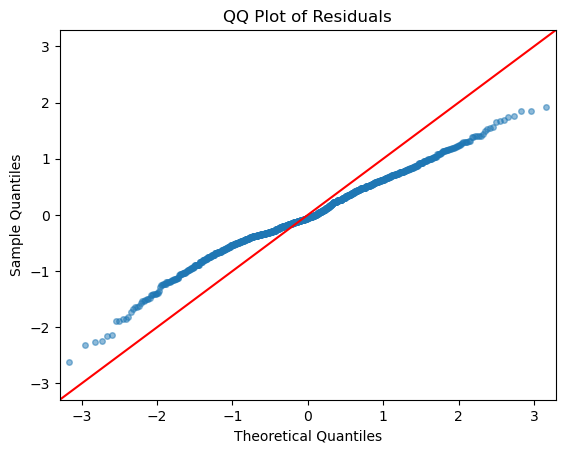

In [54]:
residuals = final_model.resid
sm.qqplot(residuals, line='45', alpha = 0.5, markersize = 4)
plt.title("QQ Plot of Residuals")
plt.show()

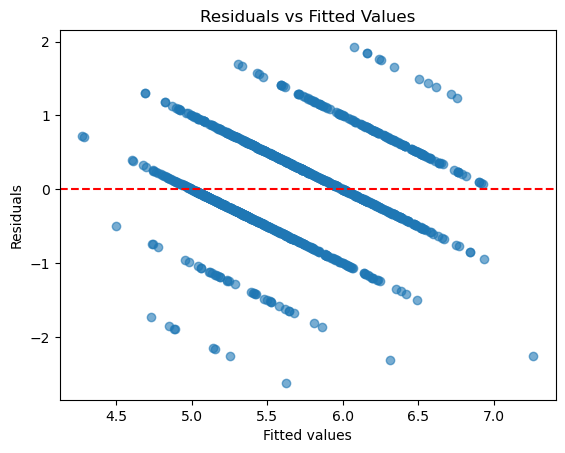

In [55]:
fitted_vals = final_model.fittedvalues
plt.scatter(fitted_vals, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

### Limitations
* We are fitting a multiple regression to a **ordinal catagorical** variable. Linear regression may predict 'impossible' values such as 6.75 etc and predict outside of our range of possible values.
* We can use tree based models or some variation of logistic regression in the future to handle this
* Sulfates, which has high correlation is not optimal, impact results a ton

### Fitting LightGBM

In [56]:
y = red_df_raw["quality"]
X = red_df_raw.iloc[:, :11]
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.25)
train_set = lgbm.Dataset(X_train, label=y_train)
valid_set = lgbm.Dataset(X_valid, label=y_valid)

params = {
    "objective": "regression",
    "learning_rate": 0.05,
    "num_leaves": 31,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.9,
    "bagging_freq": 1,
    "min_data_in_leaf": 20,
    "verbosity": -1,
}
model = lgbm.train(
    params,
    train_set,
    valid_sets=[train_set, valid_set],
    valid_names=["train", "valid"],
    num_boost_round=5000,
)



In [57]:
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
r2_score(y_test, y_pred)

0.5014463166921226

### Observations:
Tree based model (lightgbm) seems to show significant improvement over parametric linear model.

# White wine

### Collinearity checks

In [58]:
whiteCorrMatrix = white_df_raw.corr(numeric_only=True)
whiteCorrMatrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


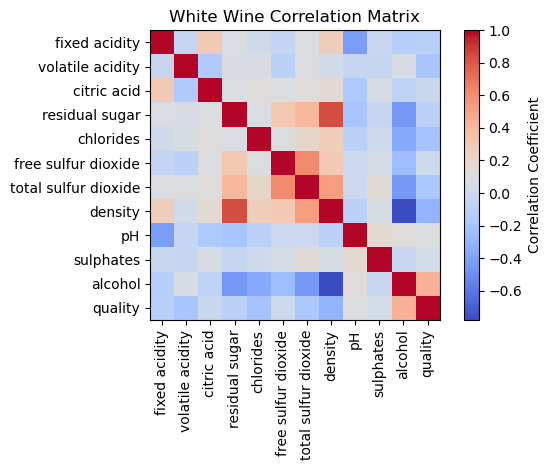

In [59]:
plt.imshow(whiteCorrMatrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(whiteCorrMatrix.columns)), whiteCorrMatrix.columns, rotation=90)
plt.yticks(range(len(whiteCorrMatrix.columns)), whiteCorrMatrix.columns)
plt.title('White Wine Correlation Matrix')
plt.tight_layout()
plt.show()

In [60]:
threshold = 0.6

high_corr = redCorrMatrix[(redCorrMatrix.abs() > threshold) & (redCorrMatrix.abs() < 1.0)]
high_corr = high_corr.dropna(how='all').dropna(axis=1, how='all')
high_corr

,fixed acidity,citric acid,free sulfur dioxide,total sulfur dioxide,density,pH
fixed acidity,NaN,0.671703,NaN,NaN,0.668047,-0.682978
citric acid,0.671703,NaN,NaN,NaN,NaN,NaN
free sulfur dioxide,NaN,NaN,NaN,0.667666,NaN,NaN
total sulfur dioxide,NaN,NaN,0.667666,NaN,NaN,NaN
density,0.668047,NaN,NaN,NaN,NaN,NaN
pH,-0.682978,NaN,NaN,NaN,NaN,NaN


In [61]:
white_train, white_test = train_test_split(white_df_raw, train_size = 0.8)

In [62]:
y = white_train['quality']
x = white_train.drop(['quality'], axis = 1)
x = sm.add_constant(x)

full_model = sm.OLS(y, x).fit()
print(full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     137.5
Date:                Mon, 03 Nov 2025   Prob (F-statistic):          8.73e-268
Time:                        23:03:31   Log-Likelihood:                -4445.7
No. Observations:                3918   AIC:                             8915.
Df Residuals:                    3906   BIC:                             8991.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  139.8022 

In [63]:
y = white_train['quality']
x = white_train.drop(['quality', 'citric acid'], axis = 1)
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     151.2
Date:                Mon, 03 Nov 2025   Prob (F-statistic):          9.46e-269
Time:                        23:03:31   Log-Likelihood:                -4446.0
No. Observations:                3918   AIC:                             8914.
Df Residuals:                    3907   BIC:                             8983.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  138.8253 

In [64]:
y = white_train['quality']
x = white_train.drop(['quality', 'citric acid', 'total sulfur dioxide'], axis = 1)
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     168.1
Date:                Mon, 03 Nov 2025   Prob (F-statistic):          7.63e-270
Time:                        23:03:31   Log-Likelihood:                -4446.1
No. Observations:                3918   AIC:                             8912.
Df Residuals:                    3908   BIC:                             8975.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 140.2490    

In [65]:
y = white_train['quality']
x = white_train.drop(['quality', 'citric acid', 'total sulfur dioxide', 'chlorides'], axis = 1)
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     189.0
Date:                Mon, 03 Nov 2025   Prob (F-statistic):          7.09e-271
Time:                        23:03:31   Log-Likelihood:                -4446.3
No. Observations:                3918   AIC:                             8911.
Df Residuals:                    3909   BIC:                             8967.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 142.7008    

In [66]:
y = white_train['quality']
x = white_train.drop(['quality', 'citric acid', 'total sulfur dioxide', 'chlorides', 'fixed acidity'], axis = 1)
x = sm.add_constant(x)

final_model = sm.OLS(y, x).fit()
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     214.7
Date:                Mon, 03 Nov 2025   Prob (F-statistic):          1.66e-270
Time:                        23:03:31   Log-Likelihood:                -4449.9
No. Observations:                3918   AIC:                             8916.
Df Residuals:                    3910   BIC:                             8966.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 106.1101    

In [67]:
x_test = white_test.drop(['quality', 'citric acid', 'total sulfur dioxide', 'chlorides', 'fixed acidity'], axis = 1)
x_test = sm.add_constant(x_test)
y_test = white_test['quality']
pred = final_model.predict(x_test)
r2_score(y_test, pred)

0.28959732936036475

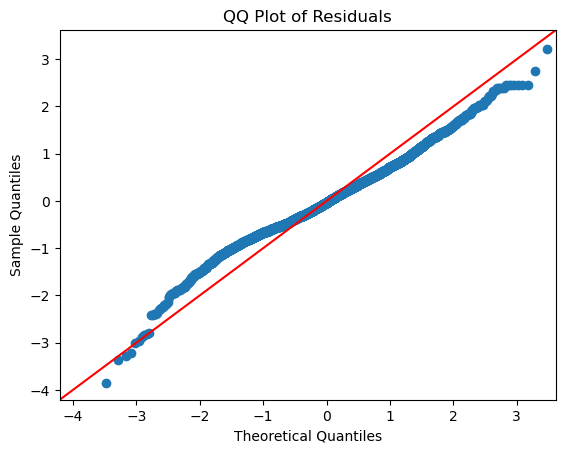

In [68]:
residuals = final_model.resid
sm.qqplot(residuals, line='45')
plt.title("QQ Plot of Residuals")
plt.show()

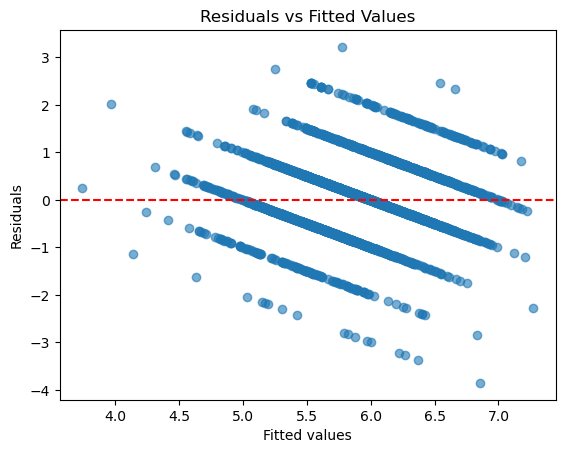

In [69]:
fitted_vals = final_model.fittedvalues
plt.scatter(fitted_vals, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

## Cross validation for errors in final model

### Redwine KEEPING free sulfur dioxide

In [72]:
y = red_train['quality']
x = red_train.drop(['quality', 'density', 'fixed acidity', 'residual sugar', 'citric acid'], axis = 1)

model = LinearRegression()

scorer = make_scorer(r2_score, greater_is_better=True)
scores = cross_val_score(model, x, y, cv=10, scoring=scorer)

scores.mean()

0.3558166761986725

### Redwine NOT KEEPING free sulfur dioxide

In [73]:
y = red_train['quality']
x = red_train.drop(['quality', 'density', 'fixed acidity', 'residual sugar', 'citric acid', 'free sulfur dioxide'], axis = 1)

model = LinearRegression()

scorer = make_scorer(r2_score, greater_is_better=True)
scores = cross_val_score(model, x, y, cv=10, scoring=scorer)

scores.mean()

0.35358157396772383